Markdown cell for User Personas and Product Features
- The biggest contributors to user satisfaction based on User_Satisfaction_Analysis.ipynb was the price of the device and the overall device performance.
- Our focus now will be to come up with user personas and product features that can reduce price and bolster performance.

Conduct a similar analysis on Performance_Score and see what features contribute most to performance. Then, create your own metric (feature engineering) to measure performance vs. price. Hint: Use a type of performance:price ratio.

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import kagglehub
from kagglehub import KaggleDatasetAdapter
import math
from ols_functions import ols_model, remove_correlated_variables

In [10]:
# Download the appropriate dataset
dataset_path = kagglehub.dataset_download("pratyushpuri/wearable-health-devices-performance-analysis")
print(dataset_path)

csv_file = os.listdir(dataset_path)[0]
df = pd.read_csv(os.path.join(dataset_path, csv_file))
display(df.head())

/Users/jordan/.cache/kagglehub/datasets/pratyushpuri/wearable-health-devices-performance-analysis/versions/1


,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3
3,2025-06-01,Polar Vantage V3,Polar,Vantage V3,Smartwatch,349.53,69.4,96.77,95.56,78.06,IP68,8.0,3.2,"WiFi, Bluetooth, NFC, LTE",12,Cross-platform,61.0
4,2025-06-01,Samsung Galaxy Watch FE,Samsung,Galaxy Watch FE,Smartwatch,502.43,39.7,92.27,98.15,75.23,IPX8,8.3,1.6,"WiFi, Bluetooth, NFC, LTE",14,Android/iOS,61.2


['Test_Date', 'Device_Name', 'Brand', 'Model', 'Category', 'Price_USD', 'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent', 'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent', 'Water_Resistance_Rating', 'User_Satisfaction_Rating', 'GPS_Accuracy_Meters', 'Connectivity_Features', 'Health_Sensors_Count', 'App_Ecosystem_Support', 'Performance_Score']
x is a Dataframe


,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Water_Resistance_Rating_encoded
1,26.5,95.92,98.20,79.76,IP68,4.9,8,2
2,161.2,92.24,96.81,74.49,IPX8,1.7,7,3
3,69.4,96.77,95.56,78.06,IP68,3.2,12,2
4,39.7,92.27,98.15,75.23,IPX8,1.6,14,3
5,287.4,92.85,99.34,77.58,5ATM,2.3,11,1


{'model': LinearRegression(),
 'train_r2': 0.474752882903809,
 'test_r2': 0.4923112287759672,
 'train_rmse': np.float64(1.4295146434408899),
 'test_rmse': np.float64(1.3167566686022791)}

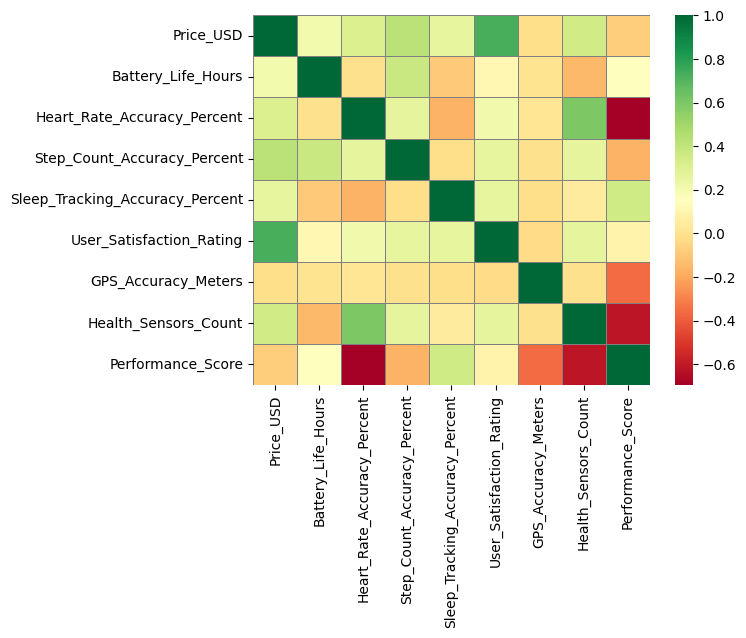

In [27]:
# For the sake of time, I will import the ols_model function and remove_correlated_variables function from User_Satisfaction_Analysis
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(data=correlation_matrix, cmap='RdYlGn', linecolor='gray', linewidths=0.5)


# Let's first test some features I personally believe should/would contribute to performance
print(df.columns.tolist())
performance_features = ['Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent', 
                        'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent', 
                        'Water_Resistance_Rating', 'GPS_Accuracy_Meters', 
                        'Health_Sensors_Count']
performance_features_r2 = ols_model(x=df[performance_features], y=df['Performance_Score'], return_details=True)
display(performance_features_r2)

Based on the R^2 score, we can see that the features that I assumed would contribute most to the performance only contribute to ~49% of the variance explained in Performance_Score. Let's now look into what features actually contribute most to the performance score through the removal of multi-collinearity and filtering down to our final features.

In [ ]:
remove_correlated_variables(df=df, features=df[~'Perf'], target = )